In [41]:
%matplotlib inline

import os
import json
import pandas as pd
import matplotlib.pyplot as plt



path_to_json = '/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/results' 
#'/home/fatma/Data/PhD/code/prism_ws/prism-svn/prism/tests/autogen_testfiles/grid_3_topomap/'
json_ext = '.json'

#[u'All Reallocations Time', u'JointPolicyCreation',
#       u'Nested Product Time', u'NumReallocations', u'ReallocationStates',
#       u'Reallocations', u'Team MDP Time', u'Time', u'Total Time', u'doors',
#       u'nestedProductStates', u'nestedProductTimes', u'productCreation',
#       u'robots', u'tasks', u'teamMDPStates', u'teamMDPTransitions', u'trial']

df_dataTypes = {u'All Reallocations Time':'long', u'JointPolicyCreation':'dict',
       u'Nested Product Time':'long', u'NumReallocations':'int', u'ReallocationStates':'int',
       u'Reallocations':'dict', u'Team MDP Time':'long', u'Time':'datetime', u'Total Time':'long', u'doors':'int',
       u'nestedProductStates':'dict', u'nestedProductTimes':'dict', u'productCreation':'dict',
       u'robots':'int', u'tasks':'int', u'teamMDPStates':'int', u'teamMDPTransitions':'int', u'trial':'string',
                u'All Single Agent Solutions':'long',u'singleAgentSolutionTimes':'dict',
       u'singleAgentSolutions':'dict',u'fs':'int'}

def read_all_json_files(path_to_json,json_ext):
    stapu_data = []
    thts_data = []
    for path, subdirs, files in os.walk(path_to_json):
        for name in files:
            if name.endswith(json_ext):
                fullfn = os.path.join(path, name)
                if 'thts' not in name:
                    with open(fullfn) as json_file:
                        stapu_data.append(json.load(json_file))
                else:
                    with open(fullfn) as json_file:
                        thts_data.append(json.load(json_file))

    thts_df = pd.DataFrame(thts_data)
    stapu_df = pd.DataFrame(stapu_data)
    return [thts_df,stapu_df]

def remove_all_json_files(path_to_json,json_ext):
    
    for path, subdirs, files in os.walk(path_to_json):
        for name in files:
            if name.endswith(json_ext):
                fullfn = os.path.join(path, name)
                os.remove(fullfn)



#remove_all_json_files(path_to_json,json_ext)
[thts_df,stapu_df]=read_all_json_files(path_to_json,json_ext)

In [42]:
thts_df

""


In [43]:

def convertColumnToSeries(dfcolumn,columnname,df_dataTypes):
    dftype = df_dataTypes[columnname]
    #print dftype
    if dftype == 'int':
        converted = dfcolumn.astype(int)
    if dftype == 'long':
        converted = dfcolumn.astype(long)
    if dftype == 'dict':
        #df['tests'].values.tolist(), index=df.index
        converted = pd.DataFrame(dfcolumn.values.tolist())
    if dftype == 'string':
        converted = dfcolumn.astype(str)
    if dftype == 'datetime':
        converted = pd.to_datetime(dfcolumn)
    return converted
def parseDataFrame(df,df_dataTypes):
    meh = {}
    for c in df.columns:
        dftype = df_dataTypes[c]
        if not dftype == 'datetime' and not dftype == 'dict':
            meh[c] = convertColumnToSeries(df[c],c,df_dataTypes)
    return pd.DataFrame(meh)


In [44]:
df = stapu_df
#print df.columns
#print df.ndim
#print df.size

df = parseDataFrame(df,df_dataTypes)
df = df.drop(df[df.doors > 5].index)
stapu_df = df 

AttributeError: 'DataFrame' object has no attribute 'doors'

In [35]:
df = thts_df
#print df.columns
#print df.ndim
#print df.size
#df
df = parseDataFrame(df,df_dataTypes)
df = df.drop(df[df.doors > 5].index)
thts_df = df 

,All Single Agent Solutions,Total Time,doors,fs,robots,tasks
count,1.000000e+01,1.000000e+01,10.0,10.0,10.000000,10.000000
mean,3.944781e+08,1.795499e+09,2.0,7.0,3.000000,5.000000
std,2.753948e+08,1.452488e+09,0.0,0.0,1.054093,1.490712
min,1.650831e+08,6.250975e+08,2.0,7.0,2.000000,3.000000
25%,2.461996e+08,9.240443e+08,2.0,7.0,2.000000,4.000000
50%,2.947770e+08,1.225802e+09,2.0,7.0,3.000000,5.000000
75%,4.554740e+08,1.736092e+09,2.0,7.0,4.000000,6.000000
max,1.071211e+09,4.952752e+09,2.0,7.0,4.000000,7.000000


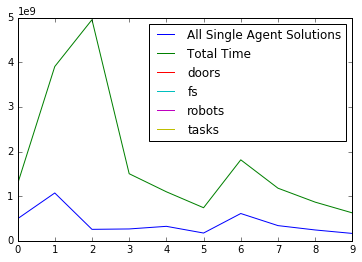

In [36]:
thts_df.plot()
thts_df.describe()

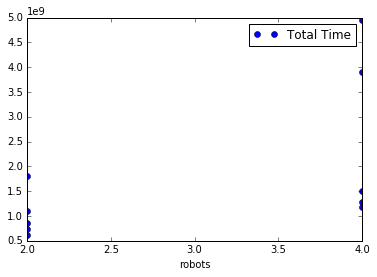

In [37]:
thts_df.plot(x=u'robots',y=u'Total Time',style='o')

In [38]:
rtdf = thts_df.groupby([u'robots',u'tasks',u'doors',u'fs'])[u'Total Time']
rtfd = thts_df.groupby([u'robots',u'tasks',u'fs',u'doors'])[u'Total Time']
trdf = thts_df.groupby([u'tasks',u'robots',u'fs',u'doors'])[u'Total Time']

In [39]:
trdf.describe()

count          mean  std           min           25%  \
tasks robots fs doors                                                         
3     2      7  2        1.0  6.250975e+08  NaN  6.250975e+08  6.250975e+08   
      4      7  2        1.0  4.952752e+09  NaN  4.952752e+09  4.952752e+09   
4     2      7  2        1.0  7.408110e+08  NaN  7.408110e+08  7.408110e+08   
      4      7  2        1.0  1.502654e+09  NaN  1.502654e+09  1.502654e+09   
5     2      7  2        1.0  8.661312e+08  NaN  8.661312e+08  8.661312e+08   
      4      7  2        1.0  1.273156e+09  NaN  1.273156e+09  1.273156e+09   
6     2      7  2        1.0  1.097784e+09  NaN  1.097784e+09  1.097784e+09   
      4      7  2        1.0  1.178449e+09  NaN  1.178449e+09  1.178449e+09   
7     2      7  2        1.0  1.813904e+09  NaN  1.813904e+09  1.813904e+09   
      4      7  2        1.0  3.904247e+09  NaN  3.904247e+09  3.904247e+09   

                                50%           75%           max  
tasks robots fs doors                                            
3     2      7  2      6.250975e+08  6.250975e+08  6.250975e+08  
      4      7  2      4.952752e+09  4.952752e+09  4.952752e+09  
4     2      7  2      7.408110e+08  7.408110e+08  7.408110e+08  
      4      7  2      1.502654e+09  1.502654e+09  1.502654e+09  
5     2      7  2      8.661312e+08  8.661312e+08  8.661312e+08  
      4      7  2      1.273156e+09  1.273156e+09  1.273156e+09  
6     2      7  2      1.097784e+09  1.097784e+09  1.097784e+09  
      4      7  2      1.178449e+09  1.178449e+09  1.178449e+09  
7     2      7  2      1.813904e+09  1.813904e+09  1.813904e+09  
      4      7  2      3.904247e+09  3.904247e+09  3.904247e+09

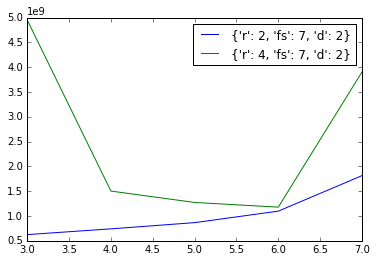

In [40]:
r = 0 
t = 1 
d = 2 
fs = 3 
    
def plot_values_totalTime(x,rtdf):

    xlist =[[]]
    ylist = [[]]
    xlistc = 0
    tags = []
    xvalues = [] 
    prevs = None
    s = None

    for a in rtdf:
        prevs = s 
        s = a[0]
        v = a[1]
        if s[x] in xvalues:
            xvalues *=0 
            xlistc = xlistc +1 
            
            if x == r:
                tags.append({'fs':prevs[fs],'t':prevs[t],'d':prevs[d]})
            elif x== t:
                tags.append({'fs':prevs[fs],'r':prevs[r],'d':prevs[d]})
            elif x == d:
                tags.append({'fs':prevs[fs],'r':prevs[r],'t':prevs[t]})
            elif x == fs:
                tags.append({'r':prevs[r],'t':prevs[t],'d':prevs[d]})
            xlist.append([])
            ylist.append([])
            if xlistc > 0:
                plt.plot(xlist[xlistc-1],ylist[xlistc-1],label=str(tags[xlistc-1]))
        
        #if xlistc > 4:
        #    break
        xvalues.append(s[x])
        xlist[xlistc].append(s[x])
        ylist[xlistc].append(v.values[0])
        
        #print s 
        #print v
    if x == r:
        tags.append({'fs':s[fs],'t':s[t],'d':s[d]})
    elif x== t:
        tags.append({'fs':s[fs],'r':s[r],'d':s[d]})
    elif x == d:
        tags.append({'fs':s[fs],'r':s[r],'t':s[t]})
    elif x == fs:
        tags.append({'r':s[r],'t':s[t],'d':s[d]})
    plt.plot(xlist[xlistc],ylist[xlistc],label=str(tags[xlistc]))    
    plt.legend()
    

plot_values_totalTime(t,rtdf)

In [106]:
xlist 


[[0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2, 4, 8, 16, 32],
 [0, 2],
 [0, 2],
 [0, 2],
 [0, 2],
 [0]]

In [107]:
ylist

[[2171137205, 962892564, 648173750, 606060425, 239977303, 50327787],
 [1639487132, 1022561338, 655630410, 404965112, 80740135, 74598485],
 [8665358240, 5710412721, 2355209292, 1405898563, 1140277301, 146462796],
 [28244401704, 15726158711, 2604223302, 5492227351, 4289717472, 269625459],
 [1929474711, 35513808774, 9978924593, 8517912584, 11395023539, 692589687],
 [207461911, 1666946477, 916505581, 894409331, 415619539, 192201517],
 [302784275, 2106156664, 1415380402, 1470148254, 376777879, 478634063],
 [644671397, 11295847728, 4696762270, 4654134912, 1284452368, 3186975025],
 [979869961, 26017792236, 13806077902, 6510697850, 1216882002, 3957709951],
 [9809453979, 138869401616, 41730197950, 31861121541, 9089791591, 10182409861],
 [491686492, 3795637304],
 [983716297, 4960146579],
 [854524576, 29298176483],
 [8526643406, 58088445051],
 [46064700788]]